# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
from main import *
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [ ]:
"""
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')
"""

"\ndef func(size):\n    a = np.random.random((size,size))\n    b = np.random.random((size,size))\n    c = a + b\n    return c\n\nfor size in [100, 1000, 10000]:\n    print('SIZE: ', size)\n    print('Timing: ')\n    saved_timing = %timeit -r 5 -n 10 -o func(size)\n    saved_timing.average   # średni czas próby\n    saved_timing.stdev     # odchylenie standardowe\n    print('Memory usage: ')\n    %memit func(size)\n    print('\n')\n"

***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


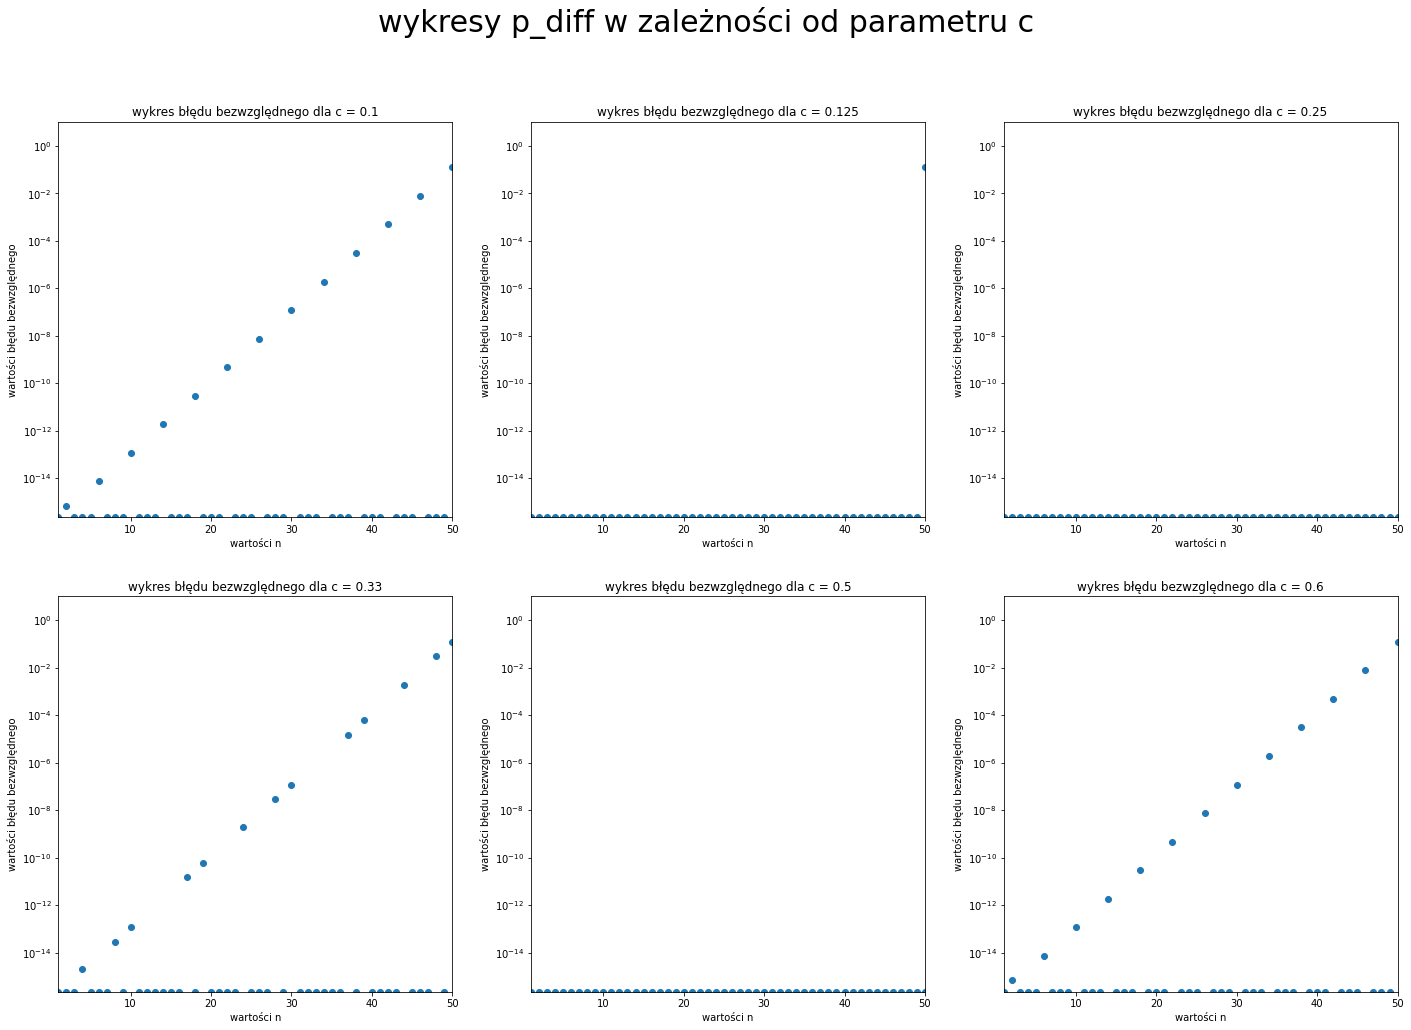

In [2]:

n = np.arange(1,51,1)
n_float = np.arange(1.0,51.0,1.0)
c = np.array([0.1,0.125,0.25,0.33,0.5,0.6])
tab = np.ones([50,6])
for i in range(50):
    for j in range(6):
        tab[i,j] = p_diff(int(n[i]),float(c[j]))
plt.figure(figsize = [24,16])
for i in range(len(c)):
    plt.subplot(int("23"+str(i+1)))
    plt.plot(n_float,tab[:,i]+2.221e-16,'o')
    plt.yscale("log")
    
    plt.title(f"wykres błędu bezwzględnego dla c = {c[i]}")
    plt.xlabel("wartości n")
    plt.ylabel("wartości błędu bezwzględnego")
    plt.ylim([2.22e-16,10])
    plt.xlim([1,50])
a =plt.suptitle("wykresy p_diff w zależności od parametru c", fontsize = 30)


2. skończony zapis posiadają liczby których rozwinięcie dziesiętne można zapisać w sposób sumy szeregu kolejnych ujemnych potęg 2 w tym przypadku są to liczby c = [0.125 , 0.25 , 0,5].
3. wyniki różnią się od siebie z powodu zaokrąglenia nieskończonego szeregu ujemnych potęg 2 w przypadku dodania większej liczby i odjęcia jej tym sposobem zapominając części rozwinięcia binarnego. wykresy nie są linią prostą ponieważ rozwinięcia binarne mogą "zapomnieć" bit = 1 wtedy błąd się pojawia lub bit = 0 co nie skutkuje zmianą błędu zaokrąglenia.
4. dominuje tutaj błąd zaokrąglenia.
5. istnieje sposób aby zmniejszyć błędy zaokrągleń poprzez m.in.: w pierwszeństwie wykonywanie działań na liczbach o zbliżonym rzędzie wielkości

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

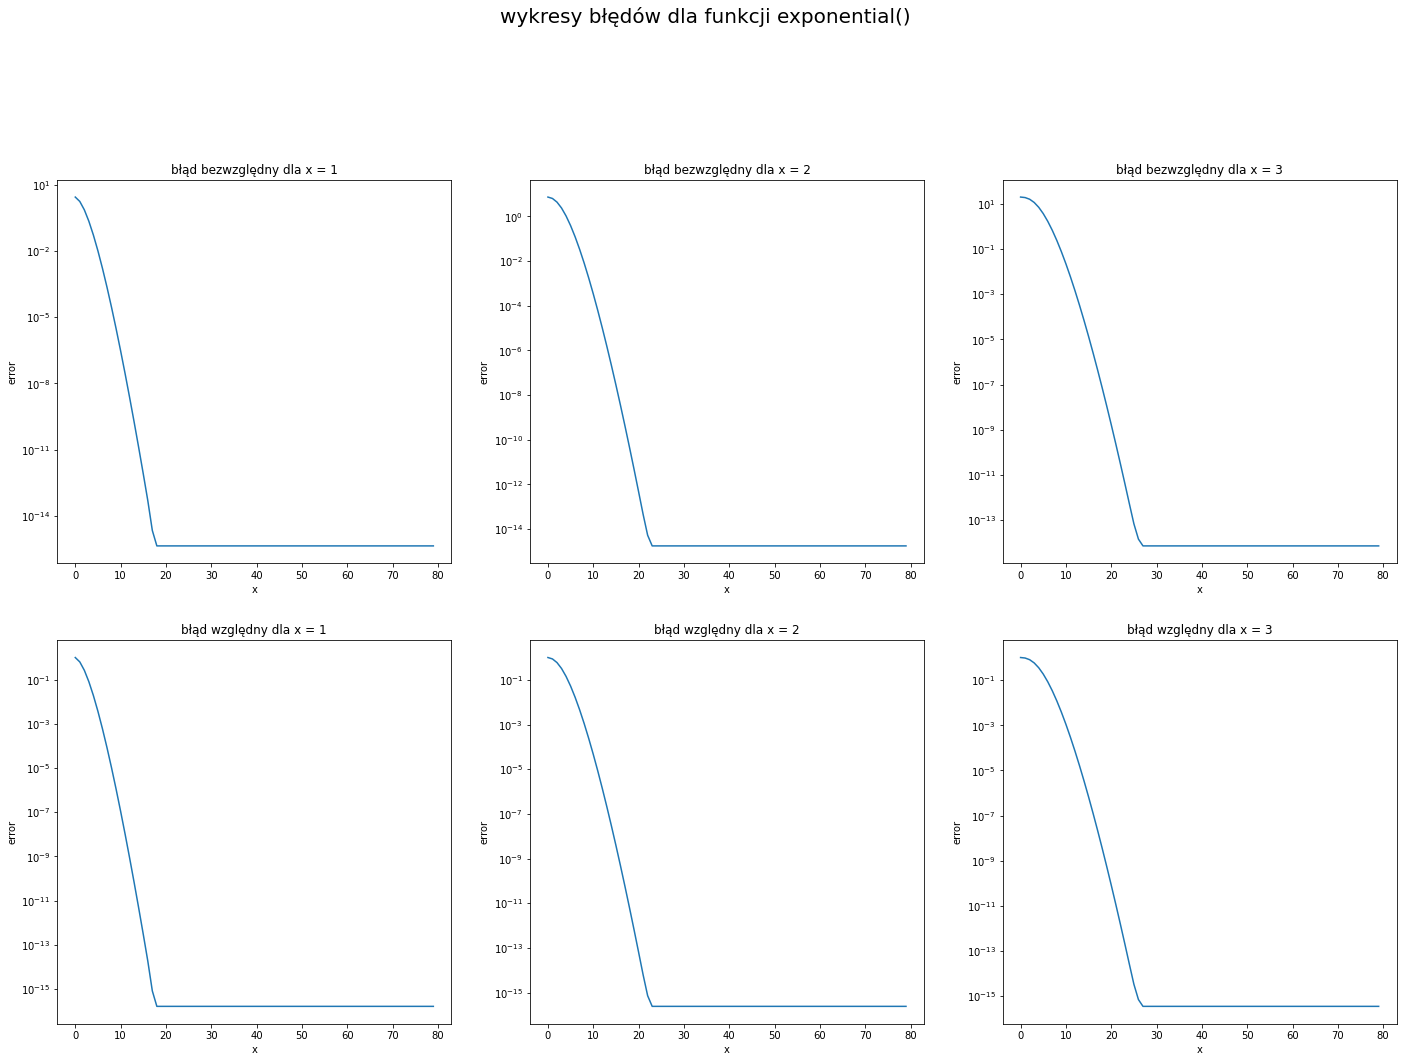

In [3]:

plt.figure(figsize = [24,24])
for j in range(3):
    plt.subplot(int("33"+str(j+1)))
    vect_of_errors = absolut_error(np.array([exponential((j+1) ,i) for i in range(80)]),np.exp((j+1) )) 
    plt.plot(vect_of_errors)
    plt.yscale("log")
    plt.title(f"błąd bezwzględny dla x = {(j+1)}")
    plt.xlabel("x")
    plt.ylabel("error")
for j in range(3,6):
    plt.subplot(int("33"+str(j+1)))
    vect_of_errors = relative_error(np.exp((j+1-3)),np.array([exponential((j+1-3) ,i) for i in range(80)])) 
    plt.plot(vect_of_errors)
    plt.yscale("log")
    plt.title(f"błąd względny dla x = {(j+1-3)}")
    plt.xlabel("x")
    plt.ylabel("error")
a =plt.suptitle("wykresy błędów dla funkcji exponential()",fontsize = 20)

1. ten przykład obrazuje błąd obcięca (błąd metody) czyli błąd wynikający z obliczenia skończonej liczby kroków dla metody posiadającej nieskończone rozwinięcie
2. dla rosnących n błąd spada aż do epsilon maszynowego i stabilizuje się na tym poziomie. wartość n przy której błąd bezwzględny wynosi epsilon maszynowe zależy od wartości x

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

Text(0.5, 1.0, 'wykres błędu bezwzględnego funkcji coskx2 dla x = 100')

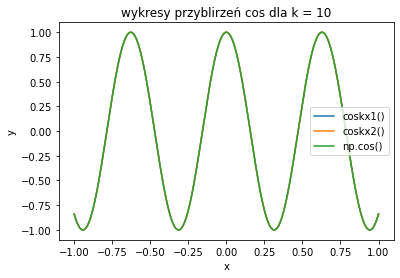

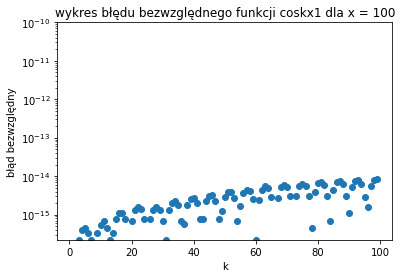

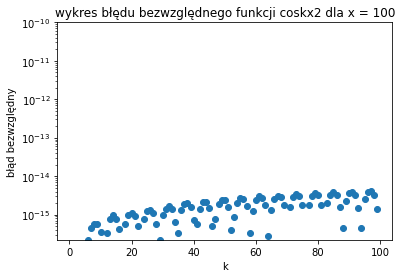

In [ ]:
k=10
x = np.linspace(-10/k,10/k, 1000)
y = np.linspace(-10/k,10/k, 1000)
error_vect = np.linspace(-10/k,10/k, 1000)
for i in range(len(x)):
    y[i] = coskx1(k , x[i])
plt.plot(x,y)
for i in range(len(x)):
    y[i] = coskx2(k , x[i])[0]
plt.plot(x,y)
plt.plot(x , np.cos(k*x))
plt.legend(["coskx1()","coskx2()","np.cos()"])
plt.title("wykresy przyblirzeń cos dla k = 10")
plt.xlabel("x")
plt.ylabel("y")
plt.figure()
n = np.arange(1,100,1)
error = np.arange(1.0,100.0,1.0)
for i in range(len(n)):
    error[i] = absolut_error(coskx1(i , 100),np.cos((i)*100))
    #coskx2(i , 100)[0]
plt.ylim([2.22e-16,1e-10])
plt.plot(n, error, 'o')
plt.yscale("log")
plt.ylabel("błąd bezwzględny")
plt.xlabel("k")
plt.title("wykres błędu bezwzględnego funkcji coskx1 dla x = 100")
plt.figure()
error = np.arange(1.0,100.0,1.0)
for i in range(len(n)):
    error[i] = absolut_error(coskx2(i , 100)[0],np.cos((i)*100))
plt.ylim([2.22e-16,1e-10])
plt.plot(n, error, 'o')
plt.yscale("log")
plt.ylabel("błąd bezwzględny")
plt.xlabel("k")
plt.title("wykres błędu bezwzględnego funkcji coskx2 dla x = 100")


* przy dużych k funkcja coskx2 popełnia minimalnie mniejszy błąd niż funkcja coskx1 (przyjmując funkcję wzorcową jako np.cos()).


***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

1. mamy do czynienia z błędami obcięcia(metody) z uwagi na nieskończony szereg opisujący liczbę pi oraz błędy zaokrągleń które są nieodłącznym elementem arytmetyki zmiennoprzecinkowej przy nieskończonych rozwinięciach binarnych liczb zapisywanych w skończonej pamięci komputera

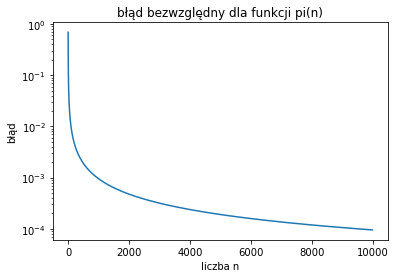

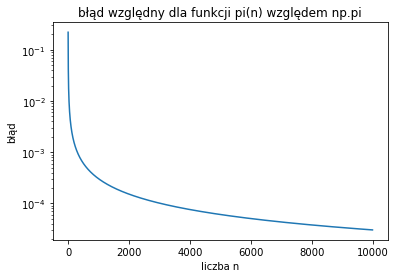

In [ ]:
pi_aprox = [pi(i) for i in range(10000)]
n = np.array([i for i in range(10000)])
error_abs = absolut_error(np.pi, pi_aprox )
error_relative = relative_error(np.pi, pi_aprox)

plt.xlabel("liczba n")
plt.ylabel("błąd")
plt.title("błąd bezwzględny dla funkcji pi(n)")
plt.plot(n,error_abs)
plt.yscale("log")
plt.figure()
plt.xlabel("liczba n")
plt.ylabel("błąd")
plt.title("błąd względny dla funkcji pi(n) względem np.pi")
plt.plot(n,error_relative)
plt.yscale("log")

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

In [ ]:
n_array = np.arange(0,1000,50)
time_avg = np.arange(0.0,1000.0,50.0)
time_stdev = np.arange(0.0,1000.0,50.0)
peak_memo = np.arange(0.0,1000.0,50.0)
time_avg2 = np.arange(0.0,1000.0,50.0)
peak_memo2 = np.arange(0.0,1000.0,50.0)
time_stdev2 = np.arange(0.0,1000.0,50.0)
for n in range(len(n_array)):
    saved_timing = %timeit -r 5 -n 10 -o coskx1(n_array[n], 0.5)
    time_avg[n] = saved_timing.average   # średni czas próby
    time_stdev[n]=saved_timing.stdev     # odchylenie standardowe
    saved_mem = %memit -o  coskx1(n_array[n],0.5)
    print(saved_mem.mem_usage.copy()[0])
    peak_memo[n] = float(saved_mem.mem_usage.copy()[0])
    print("\n")

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
2.61 µs ± 1.65 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.17 MiB
105.57421875


1.36 µs ± 346 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.00 MiB
105.57421875


1.33 µs ± 350 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.00 MiB
105.57421875


1.35 µs ± 337 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.00 MiB
105.57421875


1.34 µs ± 319 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.00 MiB
105.57421875


The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
2.31 µs ± 1.39 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.57 MiB, increment: 0.00 M

In [ ]:
for n in range(len(n_array)):
    saved_timing = %timeit -r 5 -n 10 -o coskx2(n_array[n], 0.5)
    time_avg2[n] = saved_timing.average   # średni czas próby
    time_stdev2[n] = saved_timing.stdev     # odchylenie standardowe
    saved_mem = %memit -o  coskx2(n_array[n],0.5)
    print(saved_mem.mem_usage.copy()[0])
    peak_memo2[n] = float(saved_mem.mem_usage.copy()[0])
    print("\n")

The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached.
4.12 µs ± 3.68 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.02 MiB
105.55078125


2.34 µs ± 421 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.00 MiB
105.55078125


2.4 µs ± 504 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.00 MiB
105.55078125


3.51 µs ± 571 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.00 MiB
105.55078125


2.35 µs ± 553 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.00 MiB
105.55078125


2.28 µs ± 429 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increment: 0.00 MiB
105.55078125


2.52 µs ± 364 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 105.55 MiB, increme

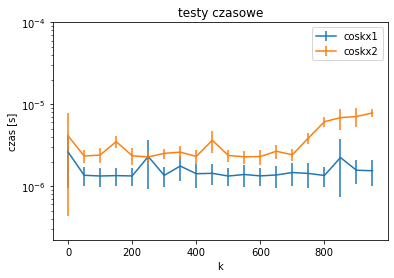

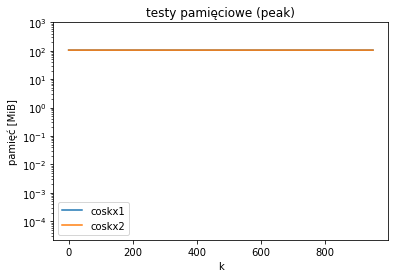

In [ ]:

plt.title("testy czasowe")    

plt.yscale("log")
plt.ylabel("czas [s]")
plt.xlabel("k")
plt.ylim([2.22e-7,1e-4])
plt.errorbar(n_array , time_avg,yerr= time_stdev, label = "coskx1")
plt.errorbar(n_array , time_avg2,yerr = time_stdev2, label = "coskx2")
plt.legend()

plt.figure()
plt.title("testy pamięciowe (peak)")

plt.yscale("log")
plt.ylim([2.22e-5,1e3])
plt.ylabel("pamięć [MiB]")
plt.xlabel("k")
plt.plot(n_array , peak_memo, label = "coskx1")
plt.plot(n_array , peak_memo2, label = "coskx2")
plt.legend()

In [ ]:
n_array = np.arange(0,1000,50)
time_avg3 = np.arange(0.0,1000.0,50.0)
time_stdev3 = np.arange(0.0,1000.0,50.0)
peak_memo3 = np.arange(0.0,1000.0,50.0)
for n in range(len(n_array)):
    saved_timing = %timeit -r 5 -n 10 -o pi(n_array[n])
    time_avg3[n] = saved_timing.average   # średni czas próby
    time_stdev3 = saved_timing.stdev     # odchylenie standardowe
    saved_mem = %memit -o  pi(n_array[n])
    print(saved_mem.mem_usage.copy()[0])
    peak_memo3[n] = float(saved_mem.mem_usage.copy()[0])
    print("\n")

710 ns ± 385 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.04 MiB
107.13671875


1.76 µs ± 438 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


908 ns ± 232 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


1.74 µs ± 537 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


600 ns ± 245 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


1.52 µs ± 463 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


646 ns ± 212 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, increment: 0.00 MiB
107.13671875


630 ns ± 180 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 107.14 MiB, 

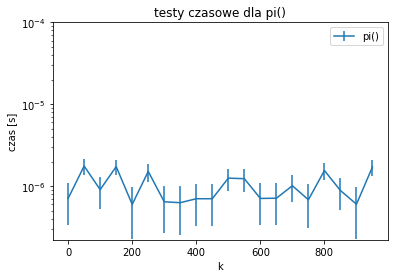

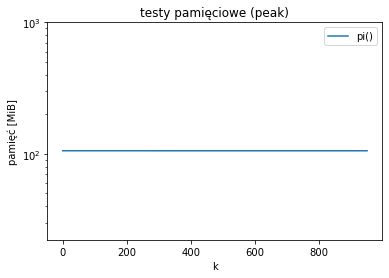

In [ ]:
plt.title("testy czasowe dla pi()")    

plt.yscale("log")
plt.ylabel("czas [s]")
plt.xlabel("k")
plt.ylim([2.22e-7,1e-4])
plt.errorbar(n_array , time_avg3,yerr= time_stdev3, label = "pi()")
plt.legend()

plt.figure()
plt.title("testy pamięciowe (peak)")

plt.yscale("log")
plt.ylim([2.22e1,1e3])
plt.ylabel("pamięć [MiB]")
plt.xlabel("k")
plt.plot(n_array , peak_memo, label = "pi()")
plt.legend()

Text(0.5, 1.0, 'wykres błędu bezwzględnego funkcji pi() od czasu')

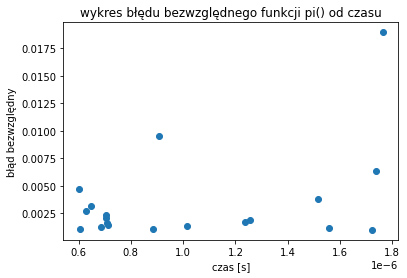

In [ ]:
list(error_abs).append(absolut_error(np.pi, pi(1000) ))
x = [error_abs[i] for i in n_array]
plt.plot(time_avg3,x,'o')
plt.xlabel("czas [s]")
plt.ylabel("błąd bezwzględny")
plt.title("wykres błędu bezwzględnego funkcji pi() od czasu")

* algorytm coskx1 jest średnio szybszy niż algorytm coskx2. teoretycznie te dwa algorytmy z uwagi na swoją rekurencyjną budowę powinny mieć złożoność $O(2^n)$ lecz zaimplementowałem je z użyciem techniki "memoization" dlatego ich złożonośc obliczeniowa drastycznie spadła

* niestety o złożoności czasowej i pamięcowej algorytmu pi() nie można dużo powiedzieć (chyba %timeit i %memit nie działają jak powinny)

* jeżeli chodzi o testy pamięciowe niestety w większości przypadków dla danego algorytmu peak pamięciowy prawie się nie zmieniał. (możliwe że %memit nie działa poprawnie)

$Wnioski$:
* Analiza numeryczna jest jednym z istotniejszych zagadnień obliczeń komputerowych. Na laboratoriach zapoznałem się z jednym z najważniejszych jej aspektów - błędami numerycznymi.
* na laboratoriach miałem trudności z rozczytaniem wzorów rekurencyjnych z zad 4 (np. nie jest jasno pokazane że $sin(m-1)x$ to tak naprawdę $sin((m-1)*x)$ a nie $sin(m-1) * x$ ) co wprowadziło lekkie niezrozumienie polecenia. pomijając ten fakt reszta laboratoriów przeszła w miarę bezproblemowo. Niestety nie wiem czy funkcje %timeit oraz %memit zadziałały poprawnie
* w implementacji funkcji użyłem techniki "memoization" która znacznie zmniejszyła złożoność czasowa funkcji coskx1 oraz funkcji coskx2. Uważam że w kwestii optymalizacji tych algorytmów udało się osiągnąc zadowalające wyniki 
* na laboratoriach nauczyłem się użytecznej metody boardcastingu dla wektorów np.ndarray która może być bardzo użyteczna w niektórych sytuacjiach
* z uwagi na małą złożoność czasową ($O(n)$) algorytmu exponential()  miałem okazję zaopserwować efekt kiedy to wszelkie błędy względne przy odpowiedniej liczbie iteracji zatrzymują się w okolicach zera maszynowego. z czego można wysnuć wniosek że przy odpowiednio dużym k błędy obcięcia odgrywają coraz mniejszą rolę gdyż błędy wywołane przybliżeniem zatrzymają błąd na poziomie $epsilon$ $maszynowego$
